In [4]:
from forse.tools import spectra_estimator as spe 
import numpy as np
import matplotlib.pyplot as plt

0.0017651527447330303 8.533333333333333


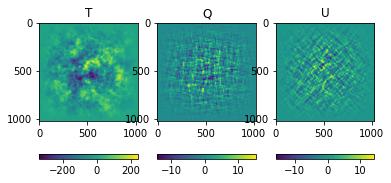

In [5]:
root_dir = '/global/homes/k/krach/usr/ForSE/forse/'
ell, DlTT,DlEE,DlBB, DlTE= np.loadtxt(root_dir+'/datautils/CMB_fiducial_totalCls.dat', usecols=(0, 1,2,3,4), unpack=True) 

Tmap,Qmap,Umap= pl.load(root_dir+'/datautils/test_cmbmap.npy')
N=1024
pix_size  = 0.5 # size of a pixel in arcminutes
fsky = (N*pl.deg2rad(pix_size/60.) )**2/4./pl.pi 
print( fsky, N*pix_size/60. )
c_min = -400  # minimum for color bar
c_max = 400   # maximum for color bar
X_width = N*pix_size/60.  # horizontal map width in degrees
Y_width = N*pix_size/60.  # vertical map width in degrees
delta_ell = 50.
ell_max = 5000.
window = (spe.cosine_window(N))


plt.subplot(131)
plt.title('T')
plt.imshow(Tmap*window ); pl.colorbar(orientation='horizontal') 
plt.subplot(132)
plt.title('Q')
plt.imshow(Qmap*window ); pl.colorbar(orientation='horizontal') 
plt.subplot(133)
plt.title('U')

plt.imshow(Umap* window  ); pl.colorbar(orientation='horizontal') 

In [12]:
Tmap.shape

(1024, 1024)

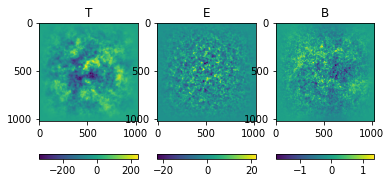

In [6]:
dwin_dx,dwin_dy,d2win_dx2,d2win_dy2,d2win_dxdy =spe. kendric_method_precompute_window_derivitives(window,pix_size)

fTmap,fEmap,fBmap = spe.kendrick_method_TQU_to_fourier_TEB(N,pix_size,
                                Tmap,Qmap,Umap,window,dwin_dx,dwin_dy,d2win_dx2,d2win_dy2,d2win_dxdy)
Emap =(np.real( (np.fft.ifft2(np.fft.fftshift(fEmap)))))
Bmap =(np.real( (np.fft.ifft2(np.fft.fftshift(fBmap)))))  
hTmap =(np.real( (np.fft.ifft2(np.fft.fftshift(fTmap)))))   
import numpy as np 

plt.subplot(131)
plt.title('T')
plt.imshow(hTmap); pl.colorbar(orientation='horizontal') 
plt.subplot(132)
plt.title('E')

plt.imshow(Emap); pl.colorbar(orientation='horizontal') 
plt.subplot(133)
plt.title('B')

plt.imshow(Bmap  ); pl.colorbar(orientation='horizontal') 

lb,clT =spe.calculate_2d_spectrum(Map= hTmap, 
                                    delta_ell= delta_ell,ell_max=ell_max,
                                  pix_size=pix_size,N=N)
lb,clTE =spe.calculate_2d_spectrum(Map= hTmap,Map2=Emap, 
                                    delta_ell= delta_ell,ell_max=ell_max,
                                  pix_size=pix_size,N=N)
lb,clTB =spe.calculate_2d_spectrum(Map= hTmap,Map2=Bmap, 
                                    delta_ell= delta_ell,ell_max=ell_max,
                                  pix_size=pix_size,N=N)
lb,clEB =spe.calculate_2d_spectrum(Map= Emap,Map2=Bmap, 
                                    delta_ell= delta_ell,ell_max=ell_max,
                                  pix_size=pix_size,N=N)
lb,clE =spe.calculate_2d_spectrum(Emap,delta_ell,ell_max,pix_size,N)
lb,clB =spe.calculate_2d_spectrum(Bmap,delta_ell,ell_max,pix_size,N)

No handles with labels found to put in legend.


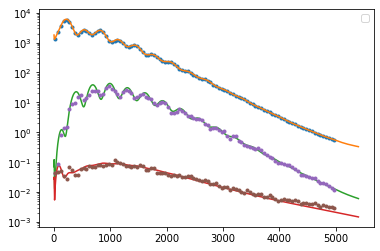

In [8]:
multiplicative_bias = (DlTT/ell/(ell +1)*2 *pl.pi) [  lb ]/clT 
#this is a VERY rough estimate (should run MC signal-only sims)
plt.semilogy(lb,clT* lb * (lb+1.)/2. / np.pi *multiplicative_bias,'.')
plt.semilogy(ell ,DlTT )
plt.semilogy(ell ,DlEE )
plt.semilogy(ell ,DlBB )

plt.semilogy(lb,clE* lb * (lb+1.)/2. / np.pi *multiplicative_bias, '.')
plt.semilogy(lb,clB* lb * (lb+1.)/2. / np.pi *multiplicative_bias, '.')
plt.legend() 

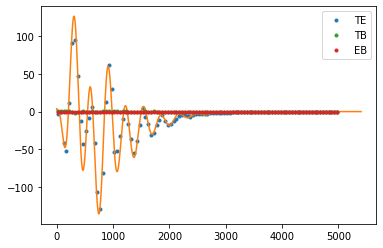

In [10]:
plt.plot(lb,clTE* lb * (lb+1.)/2. / np.pi*multiplicative_bias,'.', label='TE')
plt.plot(ell , DlTE)
plt.plot(lb,clTB* lb * (lb+1.)/2. / np.pi,'.', label='TB')
plt.plot(lb,clEB* lb * (lb+1.)/2. / np.pi,'.', label='EB')
plt.legend() 